In [6]:
!pip install kaggle

In [7]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [8]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
!ls

 data   face-mask-dataset.zip   kaggle.json  'musk detiction.zip'   sample_data


**Importing the Dependencies**

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [12]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1046.jpg', 'with_mask_3641.jpg', 'with_mask_1550.jpg', 'with_mask_2788.jpg', 'with_mask_1995.jpg']
['with_mask_3257.jpg', 'with_mask_688.jpg', 'with_mask_3447.jpg', 'with_mask_1519.jpg', 'with_mask_2130.jpg']


In [13]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1647.jpg', 'without_mask_3056.jpg', 'without_mask_1902.jpg', 'without_mask_3609.jpg', 'without_mask_882.jpg']
['without_mask_1028.jpg', 'without_mask_2788.jpg', 'without_mask_118.jpg', 'without_mask_1780.jpg', 'without_mask_2879.jpg']


In [14]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [15]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [16]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [17]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [18]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

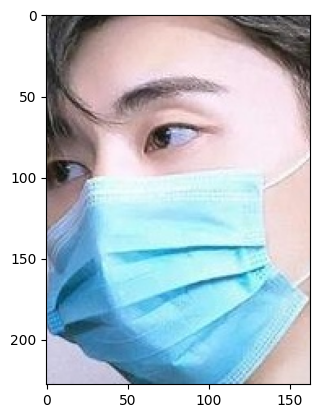

In [19]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

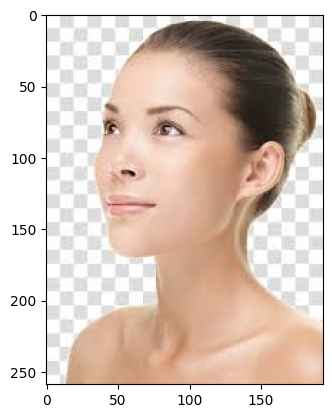

In [20]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [21]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
type(data)

list

In [23]:
len(data)

7553

array([[[49, 48, 44],
        [49, 48, 44],
        [49, 48, 44],
        ...,
        [60, 65, 58],
        [64, 69, 62],
        [65, 70, 63]],

       [[53, 52, 48],
        [52, 51, 47],
        [51, 50, 46],
        ...,
        [58, 63, 55],
        [59, 64, 56],
        [59, 64, 56]],

       [[48, 47, 43],
        [49, 48, 44],
        [50, 49, 45],
        ...,
        [61, 67, 56],
        [58, 64, 54],
        [58, 64, 54]],

       ...,

       [[45, 55, 65],
        [46, 56, 66],
        [46, 56, 66],
        ...,
        [53, 67, 78],
        [51, 65, 76],
        [50, 64, 75]],

       [[46, 56, 66],
        [48, 58, 68],
        [48, 58, 68],
        ...,
        [55, 69, 80],
        [54, 68, 79],
        [53, 67, 78]],

       [[46, 56, 66],
        [49, 59, 69],
        [50, 60, 70],
        ...,
        [58, 72, 83],
        [56, 70, 81],
        [55, 69, 80]]], dtype=uint8)
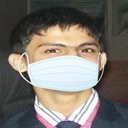

In [24]:
data[0]

In [25]:
type(data[0])

numpy.ndarray

In [26]:
data[0].shape

(128, 128, 3)

In [27]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [28]:
type(X)

numpy.ndarray

In [29]:
type(Y)

numpy.ndarray

In [30]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [31]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [34]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 34,  32,  37],
        [ 34,  32,  37],
        [ 32,  32,  36],
        ...,
        [ 79,  45,  25],
        [ 70,  40,  23],
        [ 64,  37,  25]],

       [[ 36,  34,  38],
        [ 34,  32,  36],
        [ 32,  30,  33],
        ...,
        [ 86,  51,  30],
        [ 76,  44,  27],
        [ 69,  41,  26]],

       [[ 33,  30,  33],
        [ 31,  28,  30],
        [ 28,  27,  29],
        ...,
        [ 95,  57,  35],
        [ 85,  50,  30],
        [ 78,  46,  27]],

       ...,

       [[ 33,  34,  38],
        [ 32,  33,  37],
        [ 32,  33,  37],
        ...,
        [154,  94,  57],
        [152,  91,  55],
        [152,  89,  53]],

       [[ 31,  32,  34],
        [ 32,  33,  36],
        [ 33,  34,  37],
        ...,
        [152,  92,  55],
        [152,  90,  54],
        [152,  88,  52]],

       [[ 28,  29,  31],
        [ 30,  31,  33],
        [ 34,  34,  36],
        ...,
        [151,  91,  54],
        [152,  90,  54],
        [153,  89,  53]]], dtype=uint8)
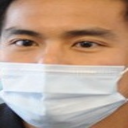

In [35]:
X_train[0]

In [36]:
X_train_scaled[0]

array([[[0.13333333, 0.1254902 , 0.14509804],
        [0.13333333, 0.1254902 , 0.14509804],
        [0.1254902 , 0.1254902 , 0.14117647],
        ...,
        [0.30980392, 0.17647059, 0.09803922],
        [0.2745098 , 0.15686275, 0.09019608],
        [0.25098039, 0.14509804, 0.09803922]],

       [[0.14117647, 0.13333333, 0.14901961],
        [0.13333333, 0.1254902 , 0.14117647],
        [0.1254902 , 0.11764706, 0.12941176],
        ...,
        [0.3372549 , 0.2       , 0.11764706],
        [0.29803922, 0.17254902, 0.10588235],
        [0.27058824, 0.16078431, 0.10196078]],

       [[0.12941176, 0.11764706, 0.12941176],
        [0.12156863, 0.10980392, 0.11764706],
        [0.10980392, 0.10588235, 0.11372549],
        ...,
        [0.37254902, 0.22352941, 0.1372549 ],
        [0.33333333, 0.19607843, 0.11764706],
        [0.30588235, 0.18039216, 0.10588235]],

       ...,

       [[0.12941176, 0.13333333, 0.14901961],
        [0.1254902 , 0.12941176, 0.14509804],
        [0.1254902 , 0

**Building a Convolutional Neural Networks (CNN)**

In [37]:
import tensorflow as tf
from tensorflow import keras

In [38]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [40]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - acc: 0.6828 - loss: 0.7944 - val_acc: 0.8545 - val_loss: 0.3336
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - acc: 0.8704 - loss: 0.3188 - val_acc: 0.9008 - val_loss: 0.2246
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9107 - loss: 0.2443 - val_acc: 0.9355 - val_loss: 0.1705
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9111 - loss: 0.2221 - val_acc: 0.9240 - val_loss: 0.1965
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9316 - loss: 0.1762 - val_acc: 0.9355 - val_loss: 0.1431


**Model Evaluation**

In [41]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.9182 - loss: 0.2135
Test Accuracy = 0.9245532751083374


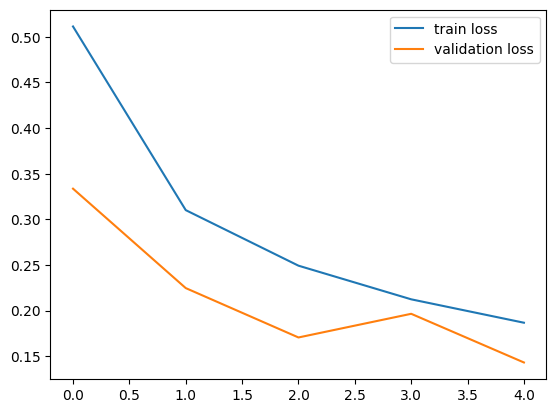

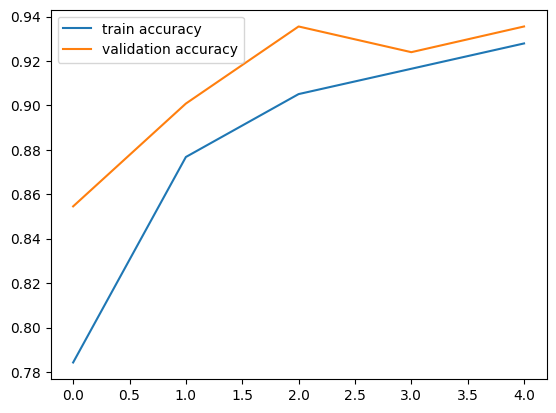

In [42]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/istockphoto-1208637836-612x612.webp


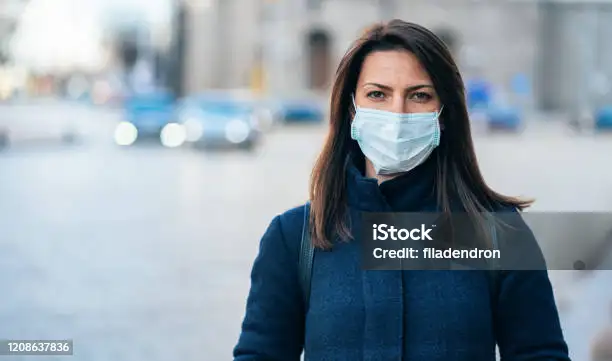

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.20339173 0.85900164]]
1
The person in the image is wearing a mask


In [45]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')